[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hjchoi-infinitt/HandsOnMed_DeepLearning/blob/main/Hands_On_EDA.ipynb)

- ##### '파일' -> '드라이브에 사본 저장' 클릭

# 데이터셋 다운로드

* kaggle 대회 링크: https://www.kaggle.com/competitions/rsna-breast-cancer-detection/overview
* 데이터셋 다운로드 링크: https://drive.google.com/drive/folders/1gSKvZ5BoSIt4Dk_LhdYOoMIBwREcVvwN?usp=sharing

In [ ]:
# 데이터셋 다운로드 할때 주의할 점:
# Med_ChatGPT_tutorial 폴더 자체에서 'Drive에 바로가기 추가' 클릭 --> '모든 위치' --> '내 드라이브' 클릭

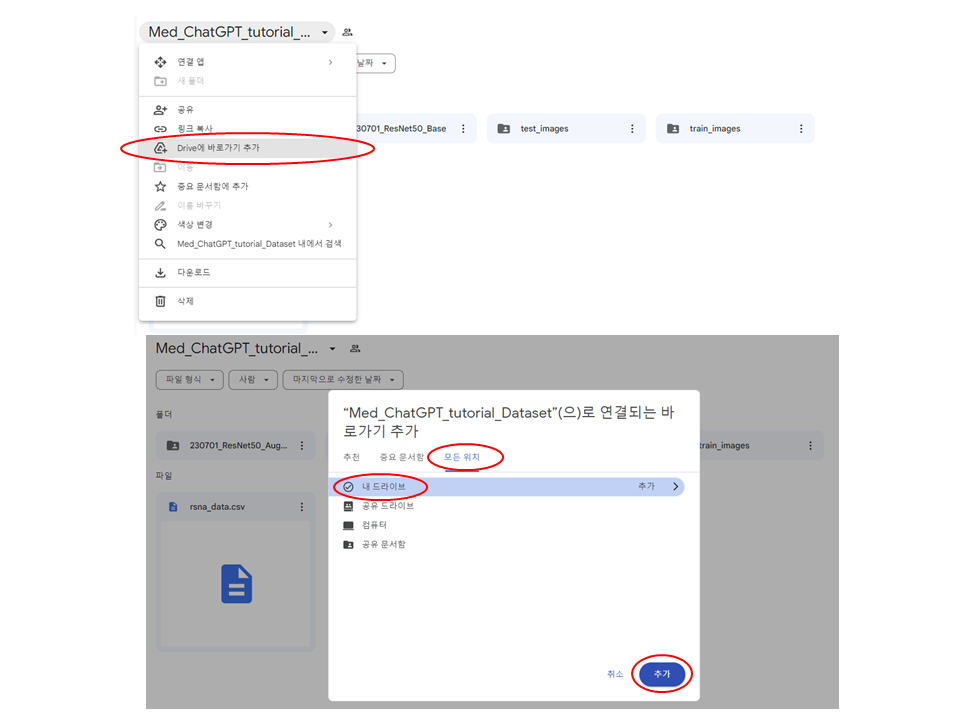

In [ ]:
# 필요한 라이브러리 설치
!pip install pydicom
!pip install SimpleITK
!pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg # GDCM 에러 해결

In [ ]:
# 코랩에서 한글깨짐 현상 해결 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt # matplotlob import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (19.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [ ]:
# pip install 하였으면, 런타임 다시 시작하기!

# Dataset files

- ##### [train/test]_images/[patient_id]/[image_id].dcm

- #### sample_submission.csv

- #### [train/test].csv Metadata for each patient and image.

In [ ]:
# google colab과 google drive 연동 (마운트)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content에 Med_ChatGPT_tutorial 폴더가 생성됨.
!git clone https://github.com/hjchoi-infinitt/HandsOnMed_DeepLearning.git

Cloning into 'HandsOnMed_DeepLearning'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), 106.01 KiB | 540.00 KiB/s, done.


In [ ]:
# 정리:
# 위의 두 코드를 실행했다면,
# 데이터 경로는 /content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset
# 코드 경로는 /content/HandsOnMed_DeepLearning

# EDA from the given metadata

In [ ]:
import pandas as pd

# train csv 불러오기
test_data = pd.read_csv("/content/HandsOnMed_DeepLearning/dataset/train.csv")
print(test_data.head())

   site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
0        1       10130   388811999          L  MLO  71.0       1       1   
1        1       10130   613462606          L   CC  71.0       1       1   
2        1       10130  1360338805          L   CC  71.0       1       1   
3        1       10130  1672636630          L  MLO  71.0       1       1   
4        1       10226   461614796          L  MLO  71.0       1       1   

   invasive  BIRADS  implant density  machine_id  difficult_negative_case  
0         1     0.0        0       B          49                    False  
1         1     0.0        0       B          49                    False  
2         1     0.0        0       B          49                    False  
3         1     0.0        0       B          49                    False  
4         1     0.0        0       C          49                    False  


In [ ]:
# test csv 불러오기
test_data = pd.read_csv("/content/HandsOnMed_DeepLearning/dataset/test.csv")
print(test_data.head())

   site_id  patient_id    image_id laterality view  age  implant  machine_id  \
0        2       10008   736471439          L  MLO   81        0          21   
1        2       10008  1591370361          L   CC   81        0          21   
2        2       10008    68070693          R  MLO   81        0          21   
3        2       10008   361203119          R   CC   81        0          21   

  prediction_id  
0       10008_L  
1       10008_L  
2       10008_R  
3       10008_R  


- 오로지 Test.csv에 존재하는 변수에 집중!
- [site_id / patient_id / image_id / laterality / view / age / implant / machine_id]에 따른 cancer 비율 분석.
- Pandas, Seaborn and Matplotlib을 사용하여 데이터의 패턴과 추세를 파악하는 데이터 탐색 스크립트 코드

===TASK===
다음의 절차에 따라 "단계별"로 오직 관심변수 간의 관계만 탐색합니다.
0. CSV 파일을 읽고 데이터를 로드합니다.
1. 전체 이미지 수를 출력해주세요.
2. 고유 환자 수를 출력해주세요.
3. 고유 이미지 수를 출력해주세요.
4. Statistics: Images per Patient
5. 관심변수의 데이터 타입을 확인하고, 그들의 고유값의 갯수를 확인하세요.
6. 관심변수 각각의 히스토그램을 모두 그려보세요.
7. 각 관심변수에 따른 암 발생률을 모두 그려보세요.
8. 관심변수들의 상관 행렬을 그려보세요.
9. 관심변수들의 산점도 행렬을 그려보세요. cancer에 따라 색을 다르게 표시하세요.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. CSV 파일 읽기 및 데이터 로드
csv_path = "/content/HandsOnMed_DeepLearning/dataset/train.csv"
data = pd.read_csv(csv_path)

In [ ]:
# 1. 전체 이미지 수 출력
total_images = data.shape[0]
print("전체 이미지 수:", total_images)

전체 이미지 수: 2316


In [ ]:
# 2. 고유한 환자 수 출력
unique_patients = data['patient_id'].nunique()
print("고유한 환자 수:", unique_patients)

고유한 환자 수: 1574


In [ ]:
# 3. 고유한 이미지 수 출력
unique_images = data['image_id'].nunique()
print("고유한 이미지 수:", unique_images)

고유한 이미지 수: 2316


In [ ]:
# 4. 환자당 이미지 수 통계
images_per_patient = data.groupby('patient_id')['image_id'].count()
print("환자당 이미지 수 통계:")
print(images_per_patient.describe())

In [ ]:
# 5. 변수의 데이터 타입 및 고유값 수 확인
variables_of_interest = ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'implant', 'machine_id', 'cancer']
numeric_variables = []
for variable in variables_of_interest:
    if data[variable].dtype in ['int64', 'float64']:
        numeric_variables.append(variable)
    print("변수:", variable)
    print("데이터 타입:", data[variable].dtype)
    print("고유값 수:", data[variable].nunique())
    print()

# 6. 각 변수에 대한 히스토그램 그리기
data.hist(column=numeric_variables, figsize=(12, 10))
plt.tight_layout()
plt.show()

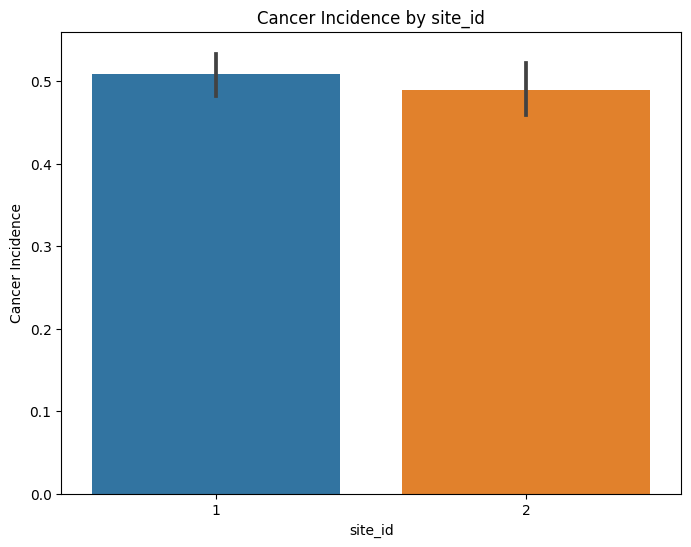

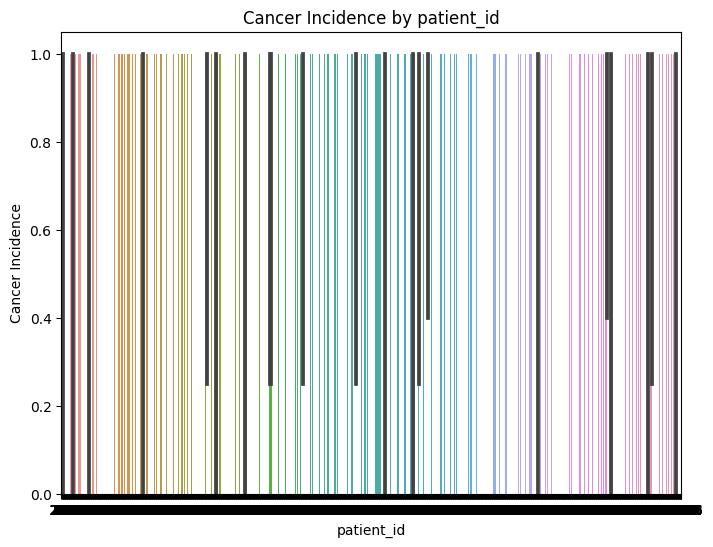

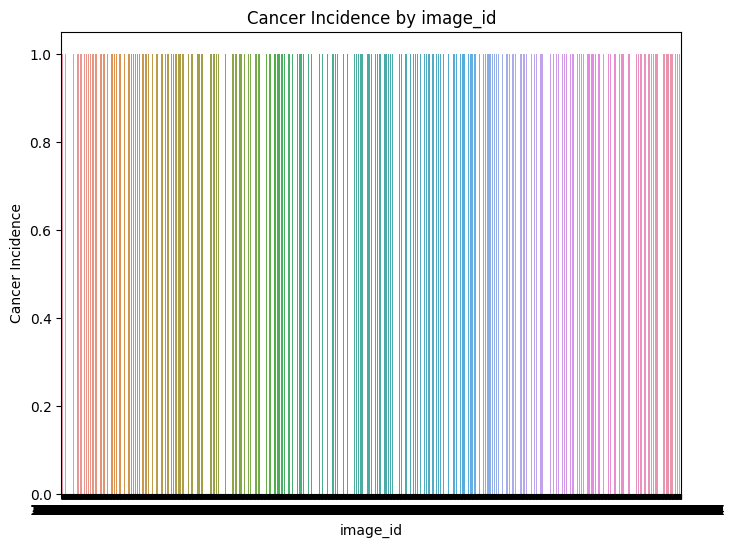

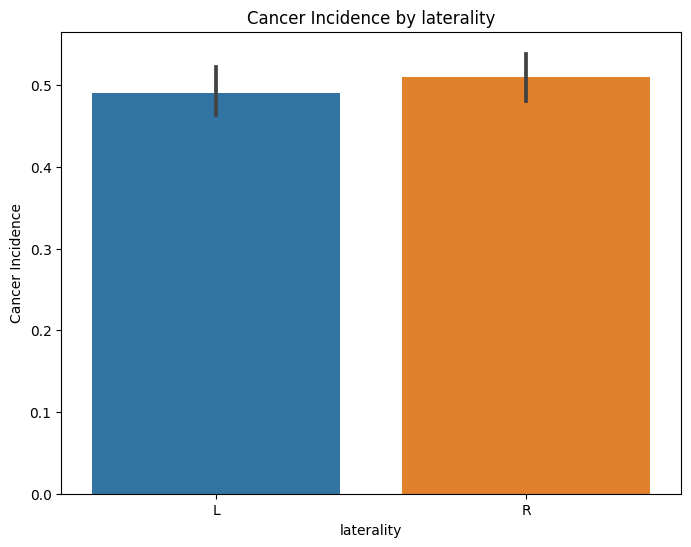

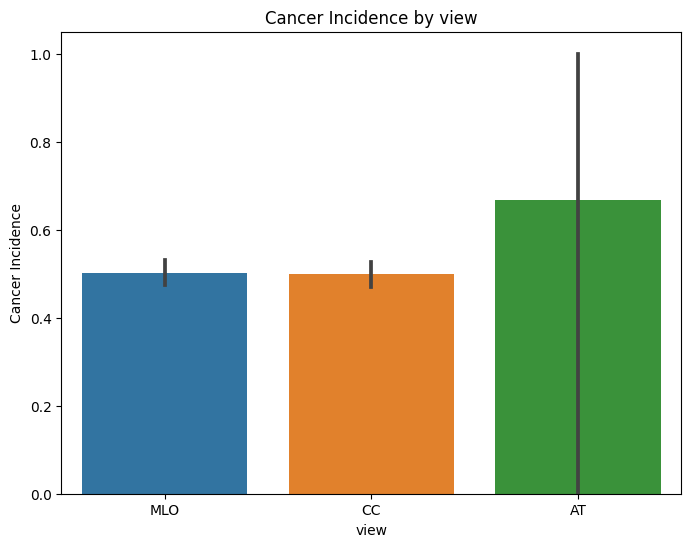

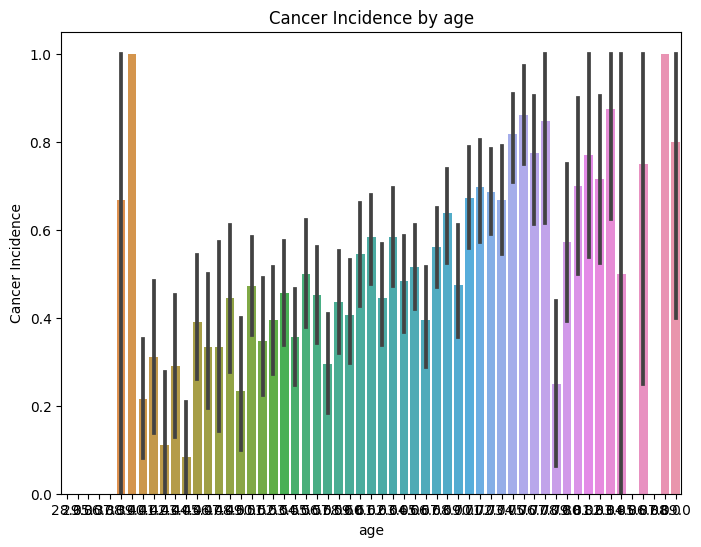

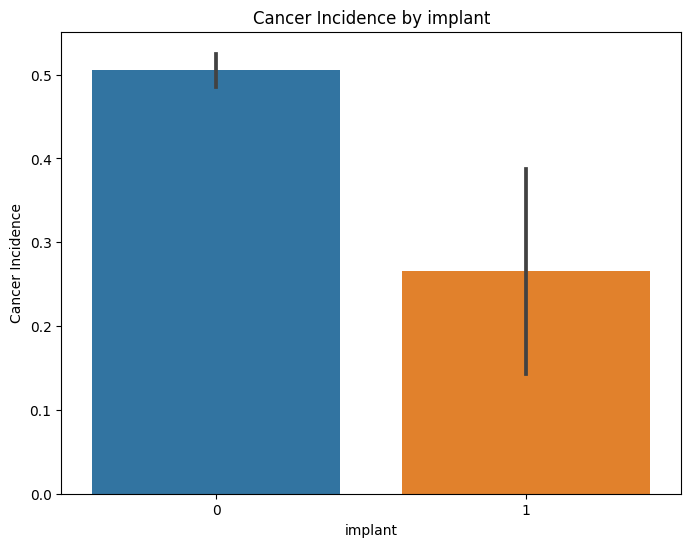

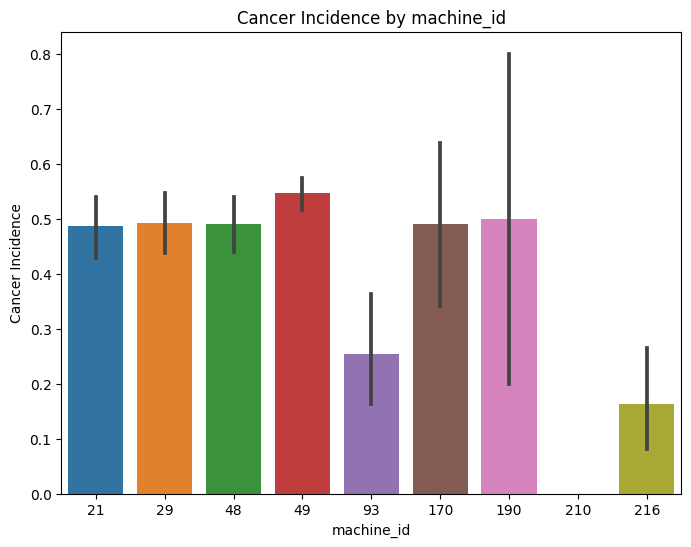

In [ ]:
# 7. 각 변수에 대한 암 발생률 그래프 그리기
for variable in variables_of_interest:
    if variable != 'cancer':
        plt.figure(figsize=(8, 6))
        sns.barplot(x=variable, y='cancer', data=data)
        plt.title(f"Cancer Incidence by {variable}")
        plt.xlabel(variable)
        plt.ylabel("Cancer Incidence")
        plt.show()

In [ ]:
# 8. 변수들 간의 상관 행렬 그리기
correlation_matrix = data[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 9. 변수들 간의 산점도 행렬 그리기 (암 여부에 따라 색상 다르게 표시)
sns.pairplot(data, vars=numeric_variables, hue='cancer', palette='husl')
plt.show()

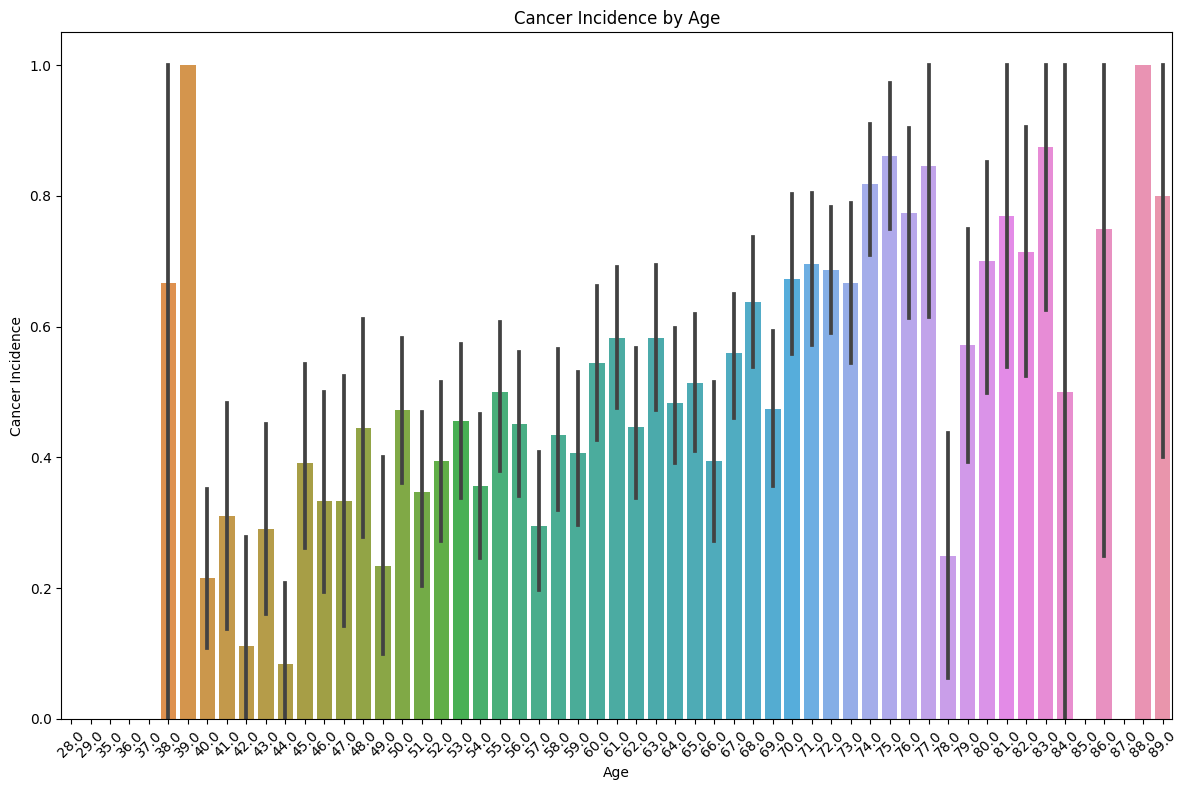

In [ ]:
# 'age'에 대한 암 발생률 그래프 그리기 (크고 선명하게)
plt.figure(figsize=(12, 8))  # 큰 캔버스 생성
sns.barplot(x='age', y='cancer', data=data) # 검은색 bar는 신뢰구간을 나타냄 일반적으로 95% 신뢰구간을 나타낸다.
plt.title("Cancer Incidence by Age")
plt.xlabel("Age")
plt.ylabel("Cancer Incidence")
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

# EDA from the dicom images

### CSV에 Path 삽입

In [ ]:
# 앞서 kaggle 홈페이지에 image 경로를 다음과 같은 방식으로 지정하였다: [train/test]_images/[patient_id]/[image_id].dcm
# csv에 path를 추가하여 image를 불러오는 방식을 적용해보자.

===TASK===
0. 데이터 프레임 변수 'data'에 'path'열을 생성합니다.
1. path는 다음과 같은 방식으로 이루어져있습니다: data_dir/train_images/{patient_id}/{image_id}.dcm
2. 'path'열을 생성한 후, 'path'열을 출력해주세요.

In [ ]:
# 데이터 디렉토리 정의
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'
data_mine_dir = '/content/HandsOnMed_DeepLearning'
# 데이터프레임 'data'에 'path' 컬럼 추가
data['path'] = data_dir + "/train_images/" + data['patient_id'].astype(str) + "/" + data['image_id'].astype(str) + ".dcm"

# 'path' 컬럼 출력
print(data['path'])


0       /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
1       /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
2       /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
3       /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
4       /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
                              ...                        
2311    /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
2312    /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
2313    /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
2314    /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
2315    /content/drive/MyDrive/Med_ChatGPT_tutorial_Da...
Name: path, Length: 2316, dtype: object


### Split Train, Test, Validation

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 프레임 'data'를 'train', 'valid', 'test'로 분리합니다. 비율은 8 대 1 대 1입니다.
train, temp = train_test_split(data, test_size=0.2, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# 분리된 'train', 'valid', 'test' 데이터 프레임에 'mode' 컬럼을 생성하여 'train', 'valid', 'test'를 표시합니다.
train['mode'] = 'train'
valid['mode'] = 'valid'
test['mode'] = 'test'

# 이들을 'rsna_data'라는 하나의 데이터 프레임으로 연결합니다.
rsna_data = pd.concat([train, valid, test])

# 'rsna_data.csv'를 'data_dir' 변수에 저장합니다.
rsna_data.to_csv(data_mine_dir + '/rsna_data.csv', index=False)

# 해당 CSV 파일을 다시 로드합니다.
rsna_data = pd.read_csv(data_mine_dir + '/rsna_data.csv')

### dicom 파싱

In [ ]:
import pydicom
# read the dicom file
dicom_data = pydicom.dcmread(rsna_data['path'].iloc[0])
dicom_data

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.7295.1.298241519
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.7295.1.298241519
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '185338.021608'
(0010, 0020) Patient ID                          LO: '7295'
(0018, 11a0) Body Part Thickness                 DS: '69.0'
(0018, 

In [ ]:
# Rows, Columns, Pixel Spacing, Bits Allocated, Bits Stored, Window Center, Window Width, Rescale Intercept, Rescale Slope, Rescale Type

In [ ]:
# Rows: 영상의 높이
# Columns: 영상의 너비
# Pixel Spacing: 두 픽셀 중심 사이의 실제(물리적) 거리를 나타냅니다. (단위는 mm)
# Bits Allocated: 한 픽셀에 할당된 비트 수
# Bits Stored: 실제로 사용되는 비트 수
# Window Center: pixel display range의 중심 값
# Window Width: pixel display range의 너비
# Rescale Intercept: pixel 값 스케일링에 사용되는 절편 값 (실제 pixel 값은 (stored pixel value) * rescale slope + rescale intercept 공식을 통해 계산된다.) SimpleITK는 자동으로 계산되지만, pydicom은 따로 계산 해줘야 한다.
# Rescale Slope: pixel 값 스케일링에 사용되는 기울기 값
# Rescale Type: Rescale Intercept와 Rescale Slope의 단위나 메소드를 설명

In [ ]:
import pydicom
import pandas as pd

# 빈 리스트 생성
dicom_list = []

# DICOM 파일 정보를 읽어오는 함수
def read_dicom(path):
    dcm = pydicom.dcmread(path)
    return [dcm.Rows if 'Rows' in dcm else None,
            dcm.Columns if 'Columns' in dcm else None,
            dcm.PixelSpacing if 'PixelSpacing' in dcm else None,
            dcm.BitsAllocated if 'BitsAllocated' in dcm else None,
            dcm.BitsStored if 'BitsStored' in dcm else None,
            dcm.WindowCenter if 'WindowCenter' in dcm else None,
            dcm.WindowWidth if 'WindowWidth' in dcm else None,
            dcm.RescaleIntercept if 'RescaleIntercept' in dcm else None,
            dcm.RescaleSlope if 'RescaleSlope' in dcm else None,
            dcm.RescaleType if 'RescaleType' in dcm else None]

# rsna_data의 'path' 컬럼의 모든 DICOM 파일을 순회하면서 정보를 추출합니다.
for path in rsna_data['path'][:100:10]:
    dicom_info = read_dicom(path)
    dicom_list.append(dicom_info)

# 추출된 정보를 데이터프레임으로 변환합니다.
dicom_data = pd.DataFrame(dicom_list, columns=['Rows', 'Columns', 'Pixel Spacing',
                                               'Bits Allocated', 'Bits Stored', 'Window Center',
                                               'Window Width', 'Rescale Intercept',
                                               'Rescale Slope', 'Rescale Type'])

dicom_data


,Rows,Columns,Pixel Spacing,Bits Allocated,Bits Stored,Window Center,Window Width,Rescale Intercept,Rescale Slope,Rescale Type
0,4096,3328,"[0.065238, 0.065238]",16,12,2047.0,4096.0,0.0,1.0,US
1,3328,2560,"[0.065238, 0.065238]",16,12,2047.0,4096.0,0.0,1.0,US
2,3328,2560,"[0.065238, 0.065238]",16,12,2047.0,4096.0,0.0,1.0,US
3,4096,3328,"[0.065238, 0.065238]",16,12,2047.0,4096.0,0.0,1.0,US
4,2776,2082,None,16,12,1666.0,1500.0,0.0,1.0,US
5,2776,2082,None,16,12,1659.0,1500.0,0.0,1.0,US
6,3062,2394,None,16,12,"[2731, 2755, 2695]","[900, 750, 1050]",0.0,1.0,US
7,4096,3328,"[0.065238, 0.065238]",16,12,2047.0,4096.0,0.0,1.0,US
8,4096,3328,"[0.065238, 0.065238]",16,12,2047.0,4096.0,0.0,1.0,US
9,4096,3328,"[0.065238, 0.065238]",16,12,2047.0,4096.0,0.0,1.0,US


In [ ]:
# describe 메소드는 이미 위에서 다룸...

dicom_data.describe()

,Rows,Columns,Bits Allocated,Bits Stored,Rescale Intercept,Rescale Slope
count,10.000000,10.000000,10.0,10.0,10.0,10.0
mean,3575.000000,2831.800000,16.0,12.0,0.0,1.0
std,579.194268,547.204167,0.0,0.0,0.0,0.0
min,2776.000000,2082.000000,16.0,12.0,0.0,1.0
25%,3128.500000,2435.500000,16.0,12.0,0.0,1.0
50%,3712.000000,2944.000000,16.0,12.0,0.0,1.0
75%,4096.000000,3328.000000,16.0,12.0,0.0,1.0
max,4096.000000,3328.000000,16.0,12.0,0.0,1.0


In [ ]:
dicom_data['Window Center'].describe()

count       10.0
unique       4.0
top       2047.0
freq         7.0
Name: Window Center, dtype: float64

In [ ]:
dicom_data['Window Width'].describe()

count       10.0
unique       3.0
top       4096.0
freq         7.0
Name: Window Width, dtype: float64

**DICOM 파일 확인**

In [ ]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

# DICOM 파일 읽기
dicom_data = pydicom.dcmread(rsna_data['path'].iloc[100])

# 모달리티 룩업 테이블 적용
a = apply_modality_lut(dicom_data.pixel_array, dicom_data)

# VOI 룩업 테이블 적용
b = apply_voi_lut(a, dicom_data)

Just pixel_array         =  131 0
After apply_modality_lut =  131.0 0.0


Text(0.5, 1.0, 'pixel array image')

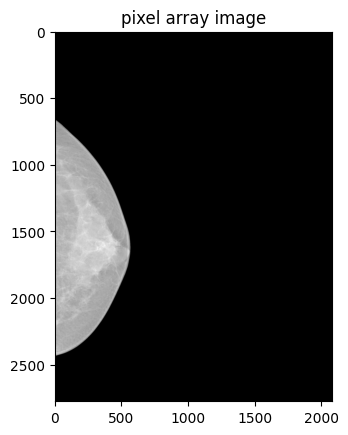

In [ ]:
plt.imshow(a, 'gray')
print("Just pixel_array         = ", dicom_data.pixel_array.max(), dicom_data.pixel_array.min())
print("After apply_modality_lut = ", a.max(), a.min())
plt.title('pixel array image')